<a href="https://colab.research.google.com/github/NotHriz/predicting-2ndheartattacj/blob/main/Predicting_Second_Heart_Attack_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pandas library
import pandas as pd


# Location of dataset
url = "https://raw.githubusercontent.com/NotHriz/predicting-2ndheartattacj/main/HeartAttackTraining.csv"

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)

In [2]:
irisdata.head(10)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
0,60,2,0,1,150,1,50,Yes
1,69,2,1,1,170,0,60,Yes
2,52,1,0,0,174,1,35,No
3,66,2,1,1,169,0,60,Yes
4,70,3,0,1,237,0,65,Yes
5,52,1,0,0,174,1,35,No
6,58,2,1,0,140,0,45,No
7,59,2,1,0,143,0,45,Yes
8,60,2,0,0,139,0,45,No
9,51,1,1,0,174,1,40,No


In [3]:
# assign data from all column except "2nd_Heart_Attack" to x (input)
x = irisdata.drop("2nd_Heart_Attack", axis=1)


# assign data from column "2nd_Heart_Attack" to y (target)
y = irisdata["2nd_Heart_Attack"]

# check output
print(x.head())
print(y.head())

   Age  Marital_Status  Gender  Weight_Category  Cholesterol  \
0   60               2       0                1          150   
1   69               2       1                1          170   
2   52               1       0                0          174   
3   66               2       1                1          169   
4   70               3       0                1          237   

   Stress_Management  Trait_Anxiety  
0                  1             50  
1                  0             60  
2                  1             35  
3                  0             60  
4                  0             65  
0    Yes
1    Yes
2     No
3    Yes
4    Yes
Name: 2nd_Heart_Attack, dtype: object


In [7]:
# check the unique values
y.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
#Convert the 2 unique values into neumerical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)



In [10]:
import numpy as np

#check new values in the y series
np.unique(y)

array([0, 1])

In [11]:
# Train Test split (20% test 80% split using set seed for debugging for now)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

In [12]:
# Optional feature scaling (might need)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Train 3 Models

In [14]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [15]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Bayesian Classifier (Gaussian Naive Bayes or Bayesian Network)
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

Model Evaluation

In [19]:
# Decision Tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_dt = dt_model.predict(x_test)

# show output
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9642857142857143
Confusion Matrix:
 [[13  0]
 [ 1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.97        15

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



In [20]:
# Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_rf = rf_model.predict(x_test)

# show output
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9642857142857143
Confusion Matrix:
 [[13  0]
 [ 1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.97        15

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



In [22]:
# Bayesian Classifier (Gaussian Naive Bayes or Bayesian Network)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_nb = nb_model.predict(x_test)

# show output
print("Bayesian Classifier Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Bayesian Classifier Accuracy: 0.8928571428571429
Confusion Matrix:
 [[12  1]
 [ 2 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.93      0.87      0.90        15

    accuracy                           0.89        28
   macro avg       0.89      0.89      0.89        28
weighted avg       0.90      0.89      0.89        28



BONUS

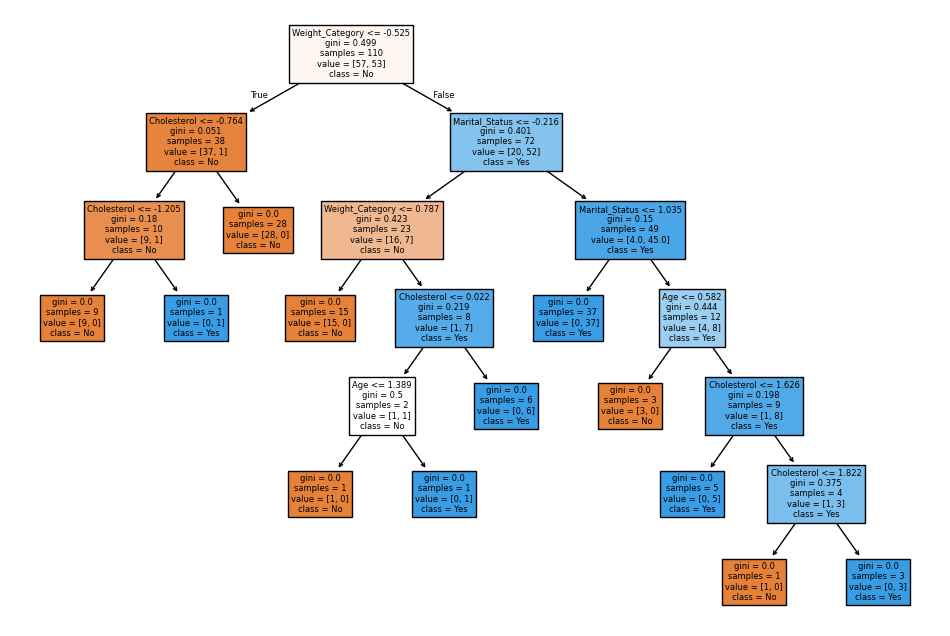

In [27]:
# Decision tree visualization
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=x.columns, class_names=['No','Yes'], filled=True)
plt.show()


In [29]:
# Feature importance in Random Forest
importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=x.columns).sort_values(ascending=False)
print(feat_importance)


Weight_Category      0.228925
Marital_Status       0.214715
Cholesterol          0.207297
Age                  0.176840
Trait_Anxiety        0.103814
Gender               0.035952
Stress_Management    0.032457
dtype: float64


In [31]:
# K-Fold cross-validation (k=5)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, x, y, cv=5)
print("5-Fold CV Accuracy:", scores)


5-Fold CV Accuracy: [0.92857143 1.         0.92857143 0.96296296 1.        ]


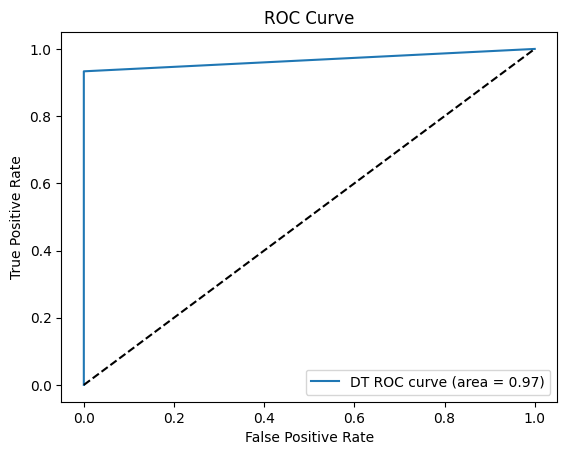

In [33]:
# ROC curve and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_dt = dt_model.predict_proba(x_test)[:, 1]  # Probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'DT ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
